diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

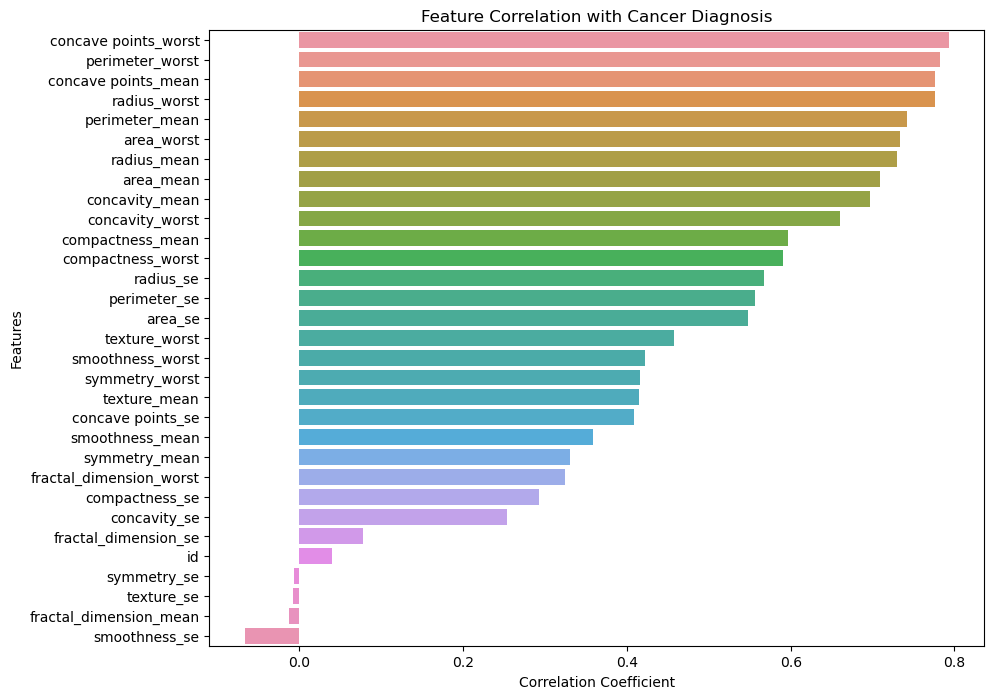

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = './breast-cancer.csv'
breast_cancer_data = pd.read_csv(data_path)

# Convert 'diagnosis' to binary format (M=1, B=0)
breast_cancer_data['diagnosis'] = breast_cancer_data['diagnosis'].map({'M': 1, 'B': 0})

# Calculate the correlation of each feature with the 'diagnosis' column
correlation_matrix = breast_cancer_data.corr()
diagnosis_correlation = correlation_matrix['diagnosis'].sort_values(ascending=False)

print(diagnosis_correlation)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=diagnosis_correlation.values[1:], y=diagnosis_correlation.index[1:])  # Exclude the first (itself)
plt.title('Feature Correlation with Cancer Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


charges             1.000000
smoker_yes          0.788783
age                 0.298624
bmi                 0.199846
region_southeast    0.075652
children            0.066442
sex_male            0.062837
region_northeast    0.009850
region_northwest   -0.036874
region_southwest   -0.051686
sex_female         -0.062837
smoker_no          -0.788783
Name: charges, dtype: float64


c:\Users\jk121\.conda\envs\MachineLearn\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


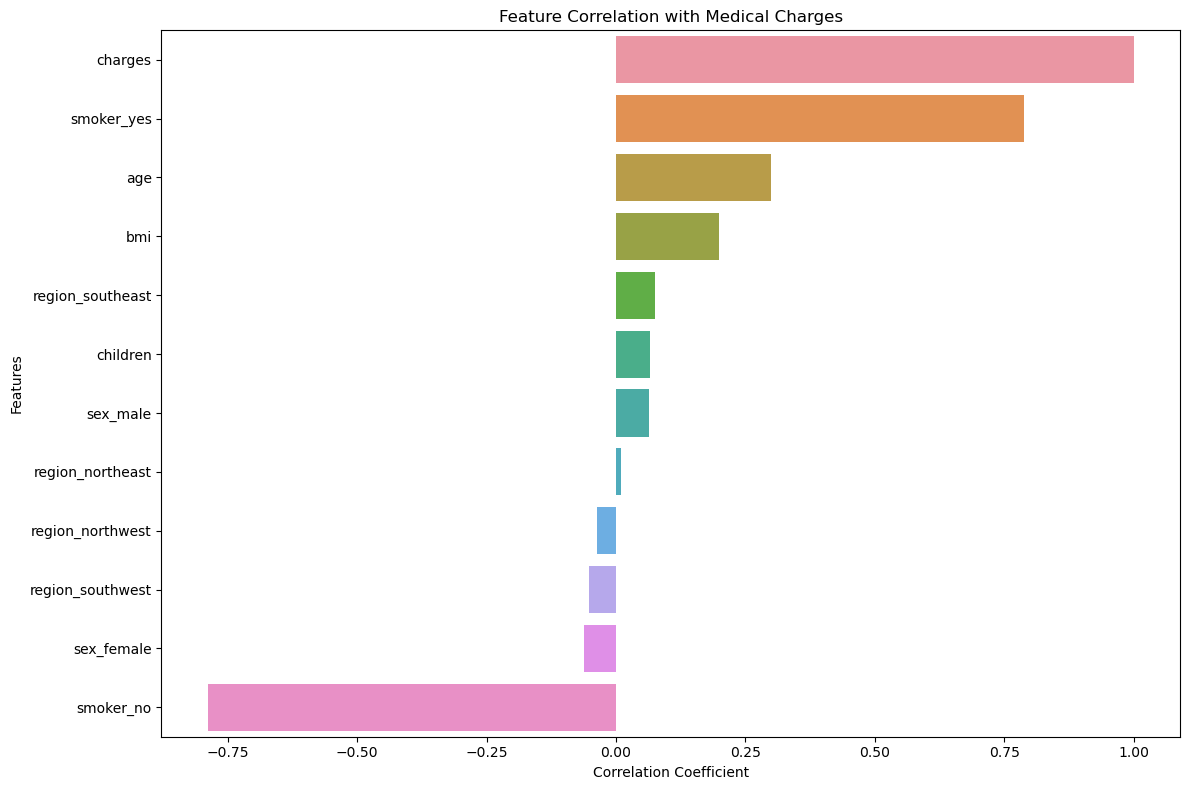

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load the medical insurance dataset
insurance_data_path = './medical_insurance.csv'
medical_insurance_data = pd.read_csv(insurance_data_path)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False)
categorical_features = ['sex', 'smoker', 'region']
encoded_features = encoder.fit_transform(medical_insurance_data[categorical_features])

# Create a DataFrame with the encoded features
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded features
medical_insurance_data_encoded = medical_insurance_data.drop(categorical_features, axis=1)
medical_insurance_data_encoded = pd.concat([medical_insurance_data_encoded, encoded_features_df], axis=1)

# Calculate the correlation of each feature with the 'charges' column
correlation_matrix_encoded = medical_insurance_data_encoded.corr()
charges_correlation = correlation_matrix_encoded['charges'].sort_values(ascending=False)

print(charges_correlation)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=charges_correlation.values, y=charges_correlation.index)
plt.title('Feature Correlation with Medical Charges')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()